In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning
import warnings

In [2]:
# Function to generate circular data points
def generate_circular_data(n, x0, y0, r1, r2):
    r = ((r2 - r1) * np.sqrt(np.random.rand(n, 1))) + r1
    theta = 2 * np.pi * np.random.rand(n, 1)
    x = r * np.cos(theta) + x0
    y = r * np.sin(theta) + y0
    return x, y

In [3]:
# Function to generate data points with normal distribution
def generate_normal_data(n, x0, y0, sigma):
    r = np.random.normal(0, sigma, n).reshape(n, 1)
    theta = 2 * np.pi * np.random.rand(n, 1)
    x = r * np.cos(theta) + x0
    y = r * np.sin(theta) + y0
    return x, y

In [4]:
def plot_data_points(x1, y1, x2, y2, clf):
    plt.plot(x1, y1, 'b.')
    plt.plot(x2, y2, 'r.')
    plt.title('Generated Points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(handles=[mpatches.Patch(color='blue', label='class1'),
                        mpatches.Patch(color='red', label='class2')])

    # Create mesh grids for visualization
    xx, yy = np.meshgrid(np.arange(-10, 10, 0.02),
                         np.arange(-10, 10, 0.02))

    # Predict the classes for mesh grid points
    Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.contour(xx, yy, Z, colors='black')

    plt.axis('square')
    plt.show()

In [5]:
# Generate data points for the first pair
x1, y1 = generate_circular_data(200, 1.5, 0, 4, 9)
x2, y2 = generate_circular_data(200, 1.5, 0, 0, 6)

# Generate data points for the second pair
x3, y3 = generate_normal_data(100, 1, 0, 1)
x4, y4 = generate_circular_data(200, 1.5, 0, 2, 6)

In [6]:
# Create pandas DataFrames for the generated data
df1 = pd.DataFrame({'x1': x1.flatten(), 'x2': y1.flatten()})
df2 = pd.DataFrame({'x1': x2.flatten(), 'x2': y2.flatten()})
df3 = pd.DataFrame({'x1': x3.flatten(), 'x2': y3.flatten()})
df4 = pd.DataFrame({'x1': x4.flatten(), 'x2': y4.flatten()})

In [7]:
# Apply polynomial feature transformation of degree 7
poly = PolynomialFeatures(7)
x_case1 = poly.fit_transform(pd.concat([df1, df2]))
x_case2 = poly.fit_transform(pd.concat([df3, df4]))

In [8]:
# Filter the UserWarning related to feature names
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [9]:
# Create target labels for classification
y_case1 = np.concatenate((np.zeros(200), np.ones(200)))
y_case2 = np.concatenate((np.zeros(100), np.ones(200)))

In [10]:
# Fit logistic regression models and make predictions
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    clf1 = LogisticRegression(penalty='l2', random_state=0, max_iter=1000).fit(x_case1, y_case1)
    clf2 = LogisticRegression(penalty='l2', random_state=0, max_iter=1000).fit(x_case2, y_case2)
    y_pred1 = clf1.predict(x_case1)
    y_pred2 = clf2.predict(x_case2)

In [11]:
# Calculate and print accuracy scores
accuracy1 = accuracy_score(y_pred1, y_case1)
accuracy2 = accuracy_score(y_pred2, y_case2)
print("Accuracy for case 1:", accuracy1)
print("Accuracy for case 2:", accuracy2)

Accuracy for case 1: 0.905
Accuracy for case 2: 0.9933333333333333


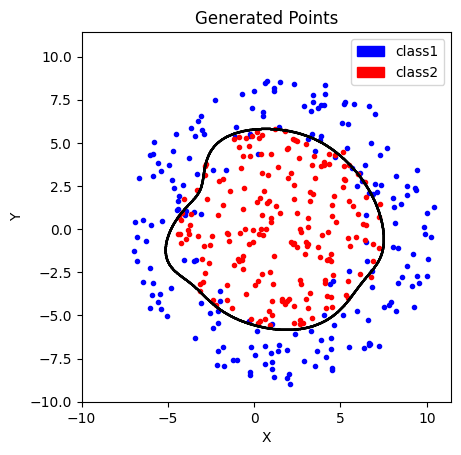

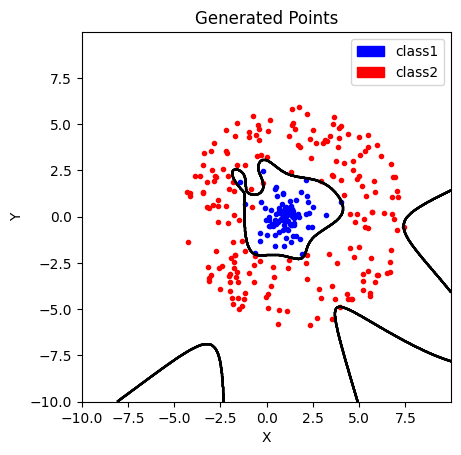

In [12]:
# Call the plot_data_points function after defining the models
plot_data_points(x1, y1, x2, y2, clf1)  # Pass clf1 as an argument
plot_data_points(x3, y3, x4, y4, clf2)  # Pass clf2 as an argument